# Objective
Logistic Regression:
In this checkpoint, we are going to work again on the Titanic data set, but this time we will use logistic regression to predict if a passenger will survive or not. 

1. Apply logistic regression. 

2. Use a confusion matrix to validate your model. 

3. Another validation matrix for classification is ROC / AUC. Do your research on them, explain them, and apply them in our case.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score

In [32]:
df= pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [33]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [34]:
df['Cabin'].fillna("N/A",inplace=True)

In [35]:
from sklearn.preprocessing import LabelEncoder   #on accorde un chiffre pour chaque elt un code 
encode = LabelEncoder()
encode.fit(df['Ticket'])  #fit pour cree le codeur lui donner une copie de données
df['Ticket']=encode.transform(df['Ticket'])

In [36]:
df_dummy = pd.get_dummies(df, columns=["Embarked"], prefix=["Embarked"])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [38]:
#labeliser la colonne TICKET
from sklearn.preprocessing import LabelEncoder   #on accorde un chiffre pour chaque elt un code 
encode = LabelEncoder()
encode.fit(df['Ticket'])  #fit pour cree le codeur lui donner une copie de données
df['Ticket']=encode.transform(df['Ticket'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,523,7.2500,N/A,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,596,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,669,7.9250,N/A,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,49,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,472,8.0500,N/A,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,101,13.0000,N/A,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,14,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,675,23.4500,N/A,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,8,30.0000,C148,C


In [39]:
encoder={
    "male":0,
    "female":1
}
df["Sex"]=df["Sex"].apply(lambda x : encoder[x])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,523,7.2500,N/A,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,596,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,669,7.9250,N/A,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,49,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,472,8.0500,N/A,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,101,13.0000,N/A,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,14,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,675,23.4500,N/A,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,8,30.0000,C148,C


In [40]:
#from sklearn.preprocessing import OneHotEncoder 
#ohe = OneHotEncoder()
#enc_df = pd.DataFrame(ohe.fit_transform(df[['Embarked']]).toarray(),columns=ohe.get_feature_names())
#enc_df

AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

In [41]:
#Comme le onehotencoding ne veut pas marcher on fait avec dummies
df = pd.get_dummies(df, columns=["Embarked"])
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,523,7.2500,N/A,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,596,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,669,7.9250,N/A,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,49,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,472,8.0500,N/A,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,101,13.0000,N/A,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,14,30.0000,B42,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,675,23.4500,N/A,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,8,30.0000,C148,1,0,0


In [43]:
df = df.drop("Name", axis=1)

In [44]:
df


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,523,7.2500,N/A,0,0,1
1,2,1,1,1,38.0,1,0,596,71.2833,C85,1,0,0
2,3,1,3,1,26.0,0,0,669,7.9250,N/A,0,0,1
3,4,1,1,1,35.0,1,0,49,53.1000,C123,0,0,1
4,5,0,3,0,35.0,0,0,472,8.0500,N/A,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,101,13.0000,N/A,0,0,1
887,888,1,1,1,19.0,0,0,14,30.0000,B42,0,0,1
888,889,0,3,1,28.0,1,2,675,23.4500,N/A,0,0,1
889,890,1,1,0,26.0,0,0,8,30.0000,C148,1,0,0


In [45]:
df = pd.get_dummies(df, columns=["Cabin"])
df



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_N/A,Cabin_T
0,1,0,3,0,22.0,1,0,523,7.2500,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1,1,1,38.0,1,0,596,71.2833,1,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,1,26.0,0,0,669,7.9250,0,...,0,0,0,0,0,0,0,0,1,0
3,4,1,1,1,35.0,1,0,49,53.1000,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,0,35.0,0,0,472,8.0500,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,101,13.0000,0,...,0,0,0,0,0,0,0,0,1,0
887,888,1,1,1,19.0,0,0,14,30.0000,0,...,0,0,0,0,0,0,0,0,0,0
888,889,0,3,1,28.0,1,2,675,23.4500,0,...,0,0,0,0,0,0,0,0,1,0
889,890,1,1,0,26.0,0,0,8,30.0000,1,...,0,0,0,0,0,0,0,0,0,0


# 1.Apply logistic regression.

In [46]:
# Prepare the features and target variables
X = df[["Age", "Sex", "Fare", "Pclass"]]
y = df["Survived"]

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [49]:
# Make predictions on the test data
y_pred = model.predict(X_test)



In [50]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)



In [51]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)



Accuracy: 0.7932960893854749
Precision: 0.7101449275362319
Recall: 0.7424242424242424


# 2.Use a confusion matrix to validate your model.

In [52]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[93 20]
 [17 49]]


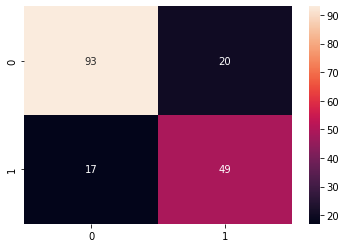

In [53]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

# 3.ROC / AUC.

ROC and AUC:
The receiver operating characteristic (ROC) curve is a graphical representation of the performance of a binary classifier. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different classification thresholds.
The area under the ROC curve (AUC) is a single number that summarizes the overall performance of the classifier. An AUC of 1.0 means the classifier is perfect, while an AUC of 0.5 means the classifier is no better than random.

To calculate the ROC curve and AUC in Python, we can use the roc_curve and roc_auc_score functions from the sklearn.metrics module:

/Users/aishaboumez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


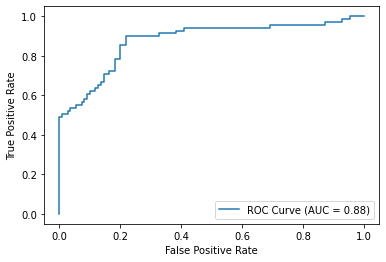

In [54]:
# Divide the data into features (X) and target (y)
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit a logistic regression model to the training data
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred_probs = clf.predict_proba(X_test)[:, 1]

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
auc = roc_auc_score(y_test, y_pred_probs)

plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()